
=== Fetching BTC (bitcoin) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching ETH (ethereum) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching USDT (tether) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching BNB (binancecoin) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching SOL (solana) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching XRP (ripple) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching USDC (usd-coin) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching ADA (cardano) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching DOGE (dogecoin) ===
Waiting 30 seconds to avoid rate limit…

=== Fetching AVAX (avalanche-2) ===
Waiting 30 seconds to avoid rate limit…


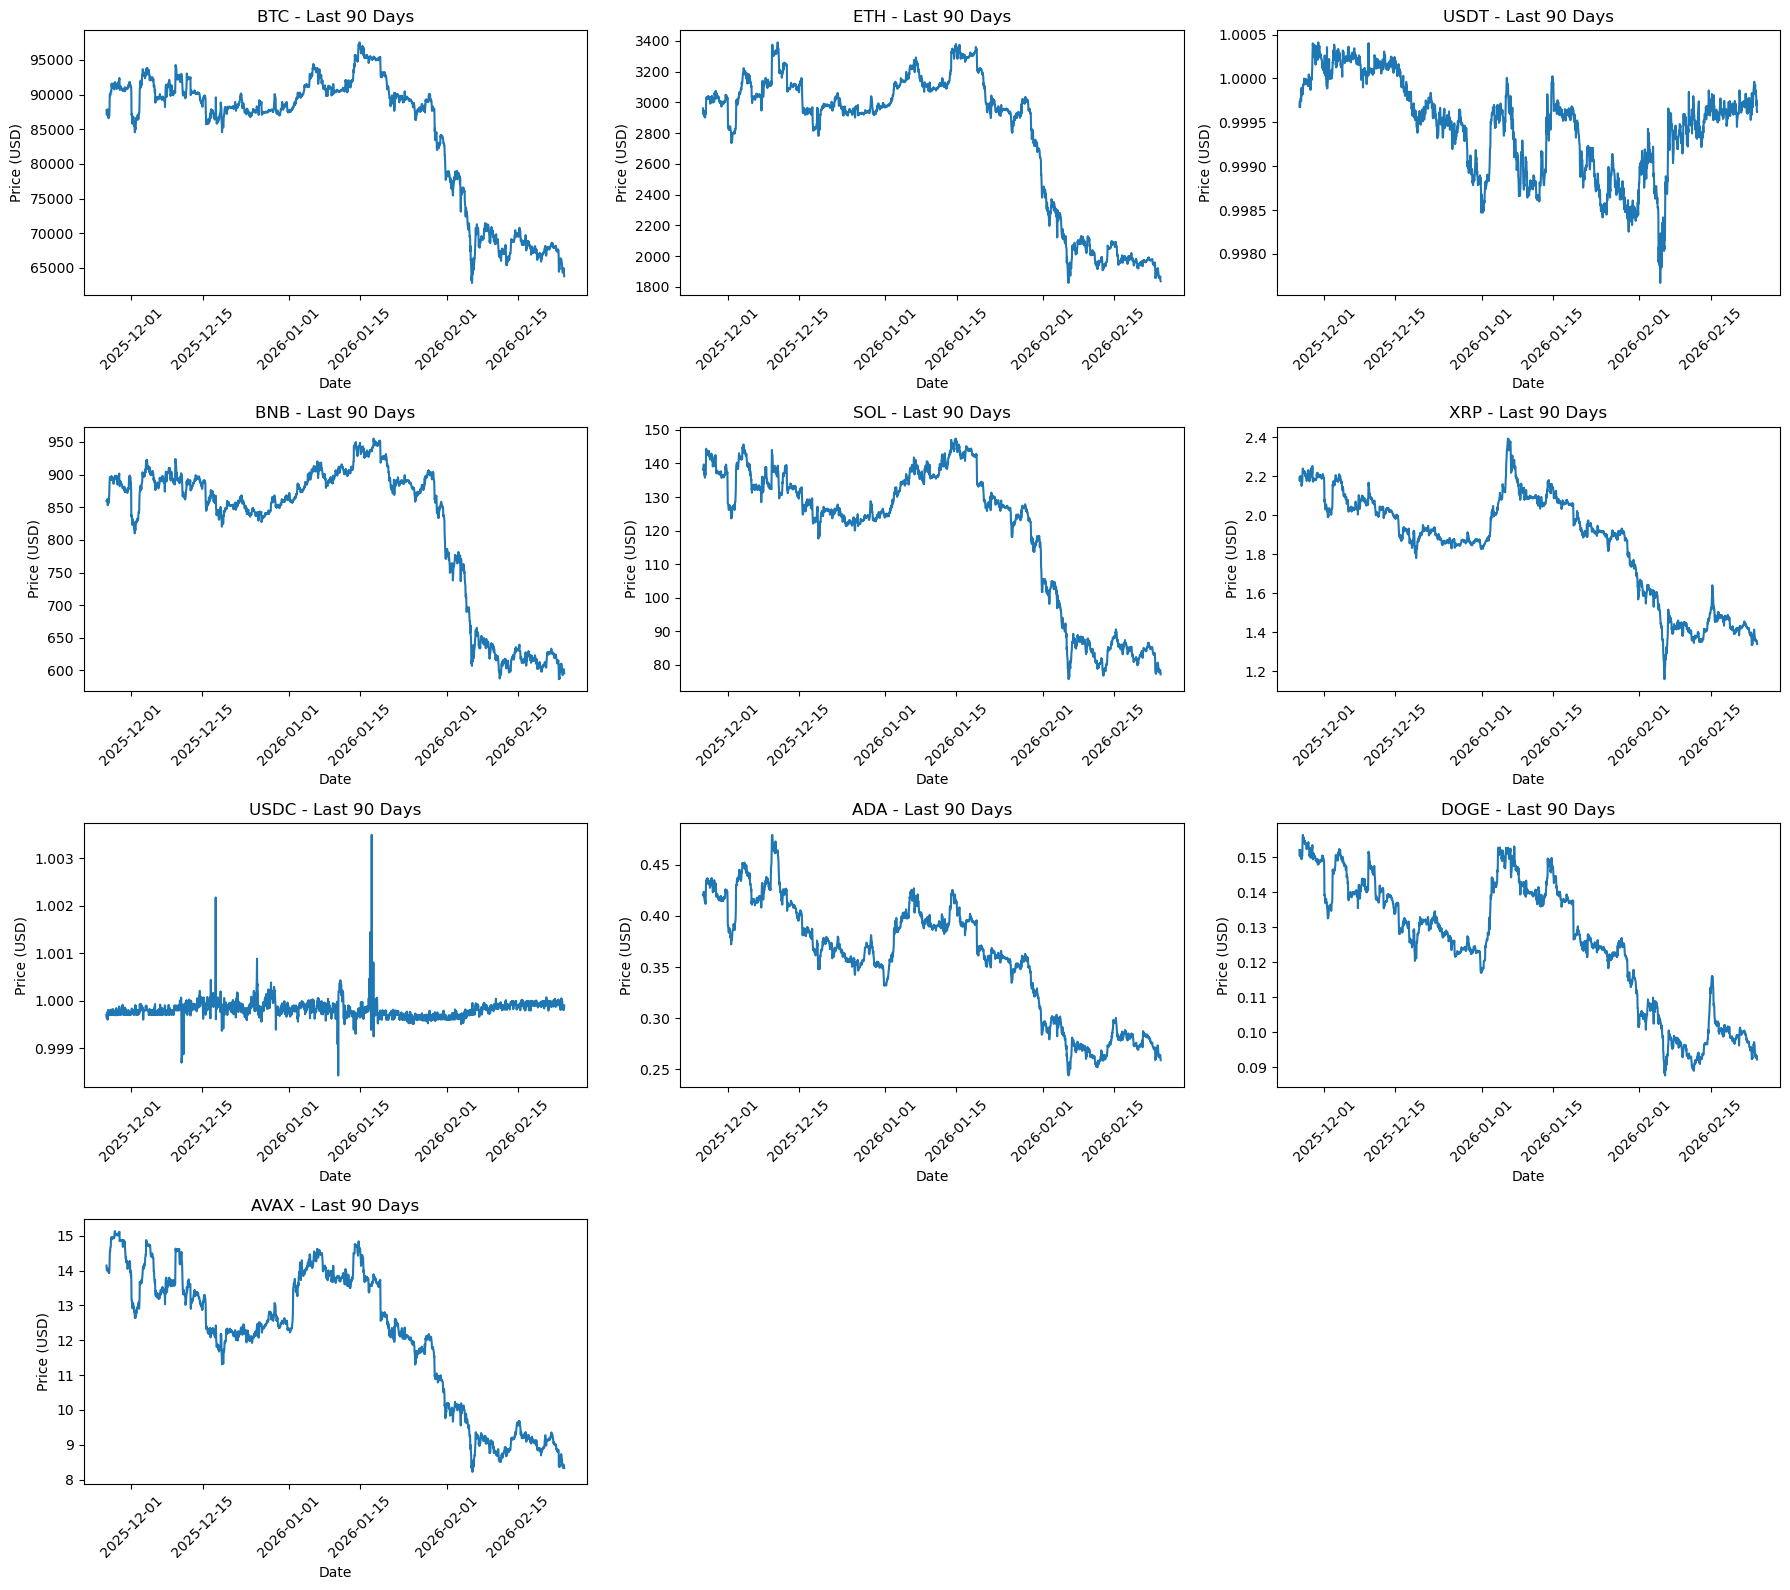

In [1]:
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import math

COINS = [
    ("bitcoin", "BTC"),
    ("ethereum", "ETH"),
    ("tether", "USDT"),
    ("binancecoin", "BNB"),
    ("solana", "SOL"),
    ("ripple", "XRP"),
    ("usd-coin", "USDC"),
    ("cardano", "ADA"),
    ("dogecoin", "DOGE"),
    ("avalanche-2", "AVAX"),
]

VS = "usd"
DAYS = 90
BASE = "https://api.coingecko.com/api/v3/coins/{id}/market_chart"

session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0 (compatible; stable-demo/1.0)"
})

def fetch_market_chart(coin_id, days=90, vs="usd"):
    url = BASE.format(id=coin_id)
    params = {"vs_currency": vs, "days": days}

    for attempt in range(3):
        r = session.get(url, params=params, timeout=30)
        if r.status_code == 200:
            data = r.json()
            df = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
            return df

        if r.status_code == 429:
            print(f"[429] Too Many Requests. Waiting 5 sec... (attempt {attempt+1}/3)")
            time.sleep(5)
            continue

        r.raise_for_status()

    raise RuntimeError(f"Failed after retries: {coin_id}")

# -----------------------------
# 3列でグリッドプロット準備
# -----------------------------
rows = math.ceil(len(COINS) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

for idx, (coin_id, symbol) in enumerate(COINS):
    print(f"\n=== Fetching {symbol} ({coin_id}) ===")
    df = fetch_market_chart(coin_id, DAYS, VS)

    ax = axes[idx]
    ax.plot(df["timestamp"], df["price"])
    ax.set_title(f"{symbol} - Last {DAYS} Days")
    ax.set_xlabel("Date")
    ax.set_ylabel(f"Price ({VS.upper()})")
    ax.tick_params(axis='x', rotation=45)

    print("Waiting 30 seconds to avoid rate limit…")
    time.sleep(30)

# 残りの空白サブプロットを非表示
for j in range(len(COINS), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()